In [12]:
#
#   SPOTIFY THING - Drew Schiller & Jesse Gabriel
#

import networkx as nx
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import operator

# Paths for node and edge dataset files
NODES_PATH = './data/nodes.csv'
EDGES_PATH = './data/edges.csv'

In [13]:
graph = nx.Graph()
artist_info = dict()

with open(NODES_PATH, 'r', encoding='utf-8') as file:
    file_data = csv.reader(file)
    i = 0
    for row in file_data:
        if i == 0:
            i += 1
            continue
        uri = row[0]
        name = row[1]
        popularity = int(row[3])

        if popularity > 25: # arbitrary
            graph.add_node(uri)
            artist_info[uri] = (name, popularity)

with open(EDGES_PATH, 'r') as file:
    file_data = csv.reader(file)
    i = 0
    for row in file_data:
        if i == 0:
            i += 1
            continue
        uri_0 = row[0]
        uri_1 = row[1]

        if graph.has_node(uri_0) and graph.has_node(uri_1):
            graph.add_edge(uri_0, uri_1)

print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 61500
Number of edges: 186676


In [42]:
degSortedNodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)
print("Artists with highest number of collaborators: ")
for i in range(5):
    print("\t" + artist_info[degSortedNodes[i][0]][0] + " (" + str(degSortedNodes[i][1]) + ")")

Artists with highest number of collaborators: 
	Johann Sebastian Bach (520)
	Mc Gw (386)
	R3HAB (386)
	Diplo (379)
	Armin van Buuren (378)


In [34]:

deg_centrality = nx.degree_centrality(graph)
ev_centrality = nx.eigenvector_centrality(graph)
sample = sorted(graph.nodes(), key=lambda n: ev_centrality[n], reverse=True)
for n in sample:
    print("{:s}: {:0.6f} deg centrality, {:0.6f} eigenvector centrality, {:n} popularity".format(artist_info[n][0], deg_centrality[n], ev_centrality[n], artist_info[n][1]))


Farruko: 0.004309 deg centrality, 0.128371 eigenvector centrality, 84 popularity
French Montana: 0.004228 deg centrality, 0.114695 eigenvector centrality, 76 popularity
Ty Dolla $ign: 0.004033 deg centrality, 0.107908 eigenvector centrality, 81 popularity
Gucci Mane: 0.004992 deg centrality, 0.104754 eigenvector centrality, 77 popularity
De La Ghetto: 0.002943 deg centrality, 0.104321 eigenvector centrality, 81 popularity
Chris Brown: 0.003480 deg centrality, 0.103186 eigenvector centrality, 87 popularity
Lil Wayne: 0.003854 deg centrality, 0.102994 eigenvector centrality, 85 popularity
J Balvin: 0.003171 deg centrality, 0.100593 eigenvector centrality, 88 popularity
Arcangel: 0.002602 deg centrality, 0.100511 eigenvector centrality, 81 popularity
Nicky Jam: 0.002959 deg centrality, 0.099560 eigenvector centrality, 82 popularity
Myke Towers: 0.002293 deg centrality, 0.098822 eigenvector centrality, 85 popularity
Snoop Dogg: 0.006033 deg centrality, 0.098316 eigenvector centrality, 84 p

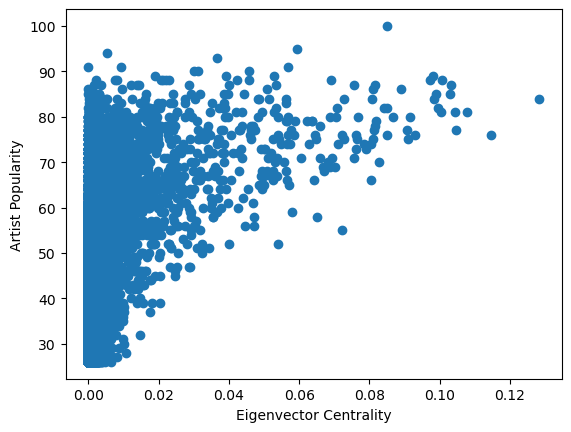

In [40]:
evs = [ev_centrality[n] for n in sample]
pops = [artist_info[n][1] for n in sample]
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Artist Popularity")
plt.scatter(*zip(*list(zip(evs, pops))))